<a href="https://www.pieriandata.com"><img src="../DATA/Logo.jpg"></a>
*Copyright by Pierian Data Inc.*

# Image Thresholding

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
img = cv2.imread('../DATA/rainbow.jpg')

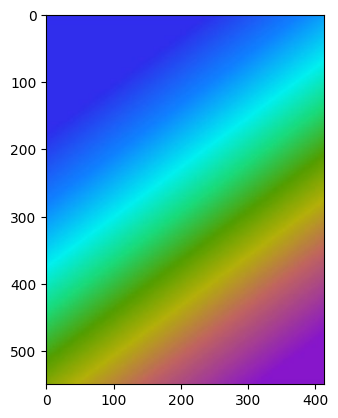

In [47]:
plt.imshow(img)

In [48]:
# Adding the 0 flag to read it in black and white
img = cv2.imread('../DATA/rainbow.jpg',0)

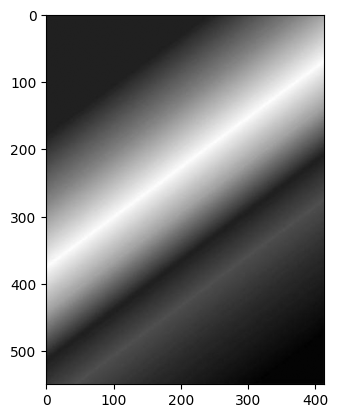

In [49]:
plt.imshow(img,cmap='gray')

## Different Threshold Types

### Binary

In [50]:
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# q: what does ret stand for?
# a:  

In [51]:
ret

127.0

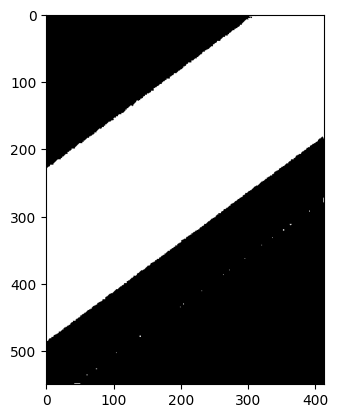

In [52]:
plt.imshow(thresh1,cmap='gray')

### Binary Inverse

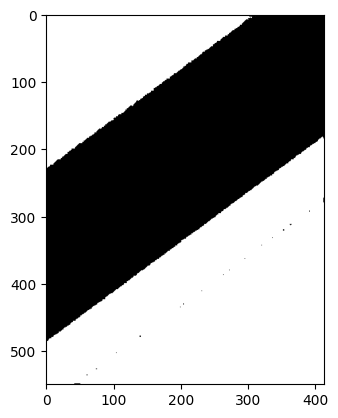

In [53]:
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh2,cmap='gray')

###  Threshold Truncation

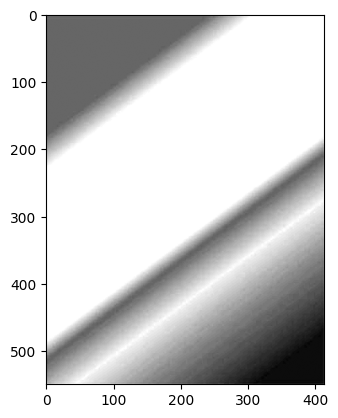

In [57]:
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
# q: what does thresh trunc do?
# a: It truncates pixel values above the threshold to the threshold value, while keeping pixel values below the threshold unchanged.
# q: what does truncate mean?
# a: To shorten something by cutting off the top or end.
plt.imshow(thresh3,cmap='gray')
plt.show()

### Threshold to Zero

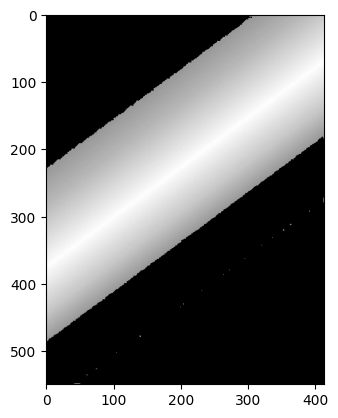

In [33]:
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
# q: what does thresh to zero do?
# a: It sets all pixel values below the threshold to zero, while keeping pixel values above the threshold unchanged.
plt.imshow(thresh4,cmap='gray')

### Threshold to Zero (Inverse)

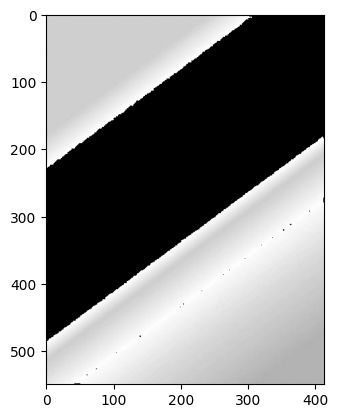

In [34]:
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
plt.imshow(thresh5,cmap='gray')

# Real World Applications

## Adaptive Thresholding



### Sudoku Image

In [59]:
img = cv2.imread("../DATA/crossword.jpg",0)

In [60]:
def show_pic(img):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

# q: explaom the above code
# a: The function show_pic takes an image as input and displays 
# it using matplotlib. It creates a figure with a size of 15x15 inches, 
# adds a single subplot to the figure, and then displays the image in 
# grayscale using the imshow method.
# q: what does 111 mean in add_subplot(111)?
# a: In add_subplot(111), the three digits represent the number of rows,
# columns, and the index of the subplot, respectively. So, 111 means 1 row,
# 1 column, and the 1st subplot (which is the only one in this case).

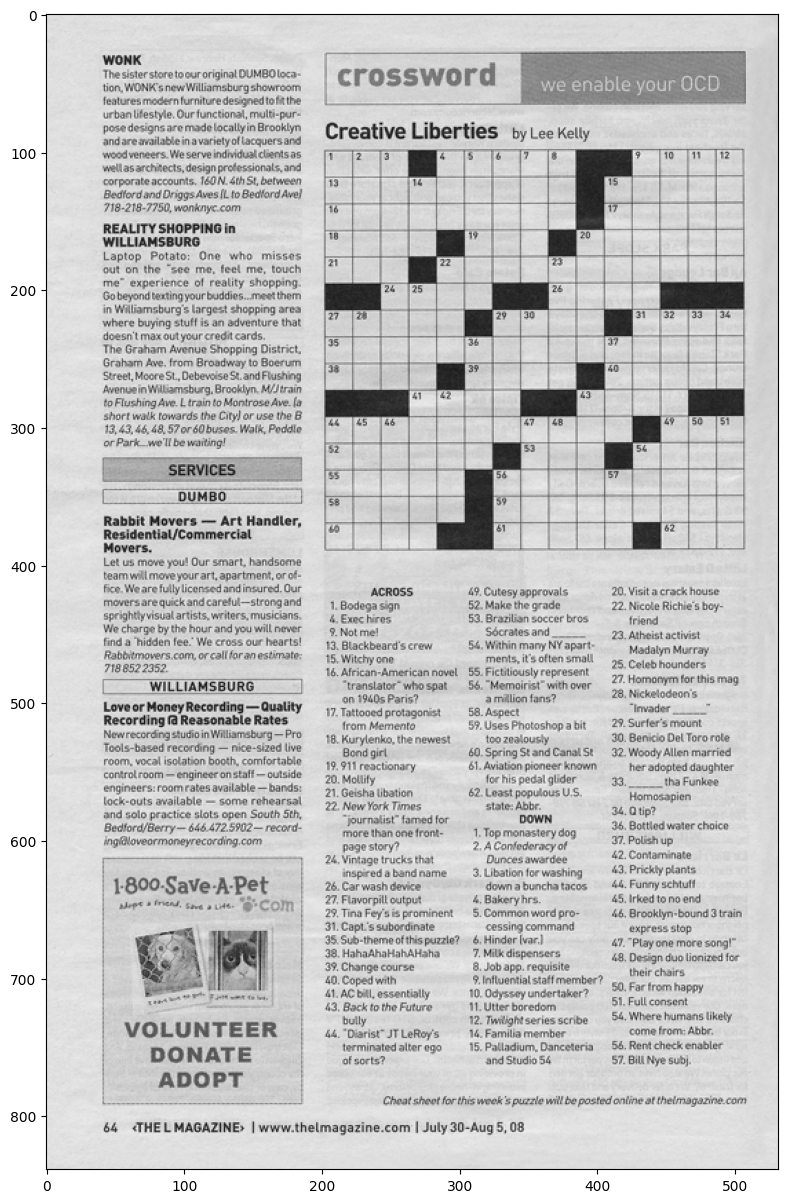

In [61]:
show_pic(img)

## Simple Binary

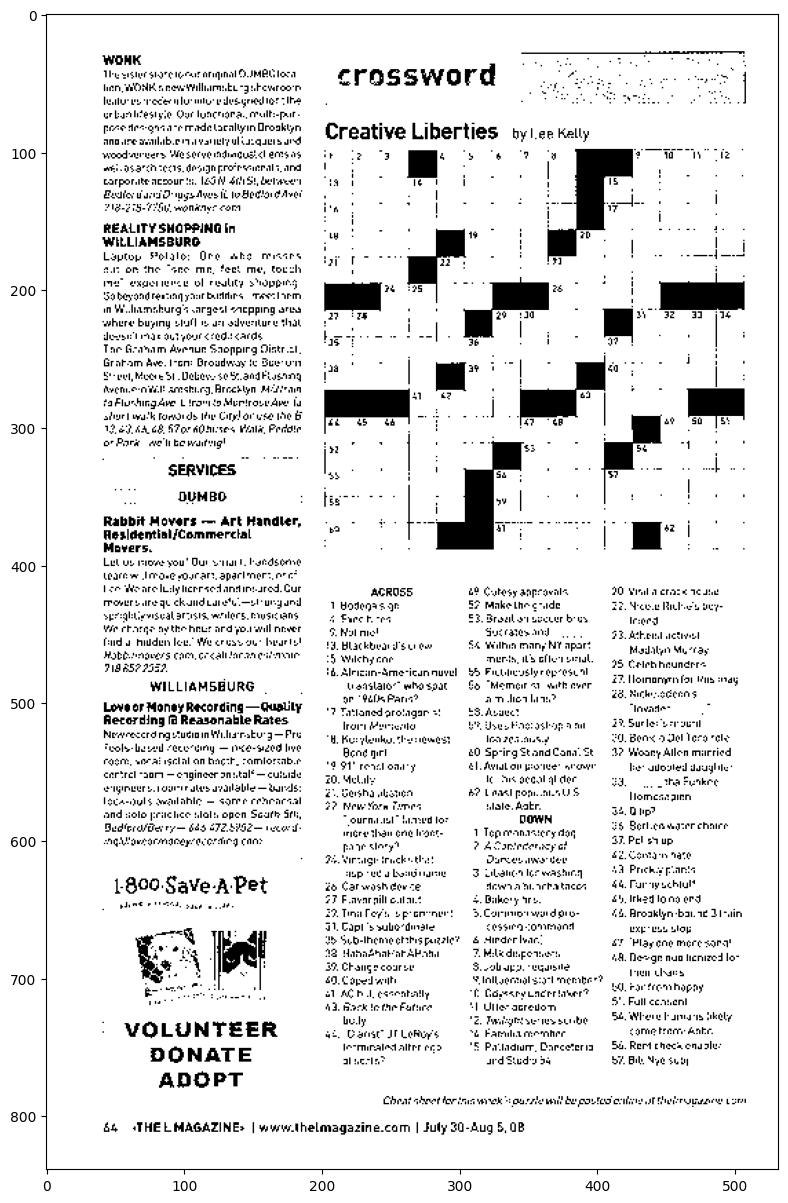

In [79]:
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
show_pic(th1)

### Adaptive Threshold

https://stackoverflow.com/questions/28763419/adaptive-threshold-parameters-confusion

    .   @param src Source 8-bit single-channel image.
    .   @param dst Destination image of the same size and the same type as src.
    .   @param maxValue Non-zero value assigned to the pixels for which the condition is satisfied
    .   @param adaptiveMethod Adaptive thresholding algorithm to use, see #AdaptiveThresholdTypes.
    .   The #BORDER_REPLICATE | #BORDER_ISOLATED is used to process boundaries.
    .   @param thresholdType Thresholding type that must be either #THRESH_BINARY or #THRESH_BINARY_INV,
    .   see #ThresholdTypes.
    .   @param blockSize Size of a pixel neighborhood that is used to calculate a threshold value for the
    .   pixel: 3, 5, 7, and so on.
    .   @param C Constant subtracted from the mean or weighted mean (see the details below). Normally, it
    .   is positive but may be zero or negative as well.

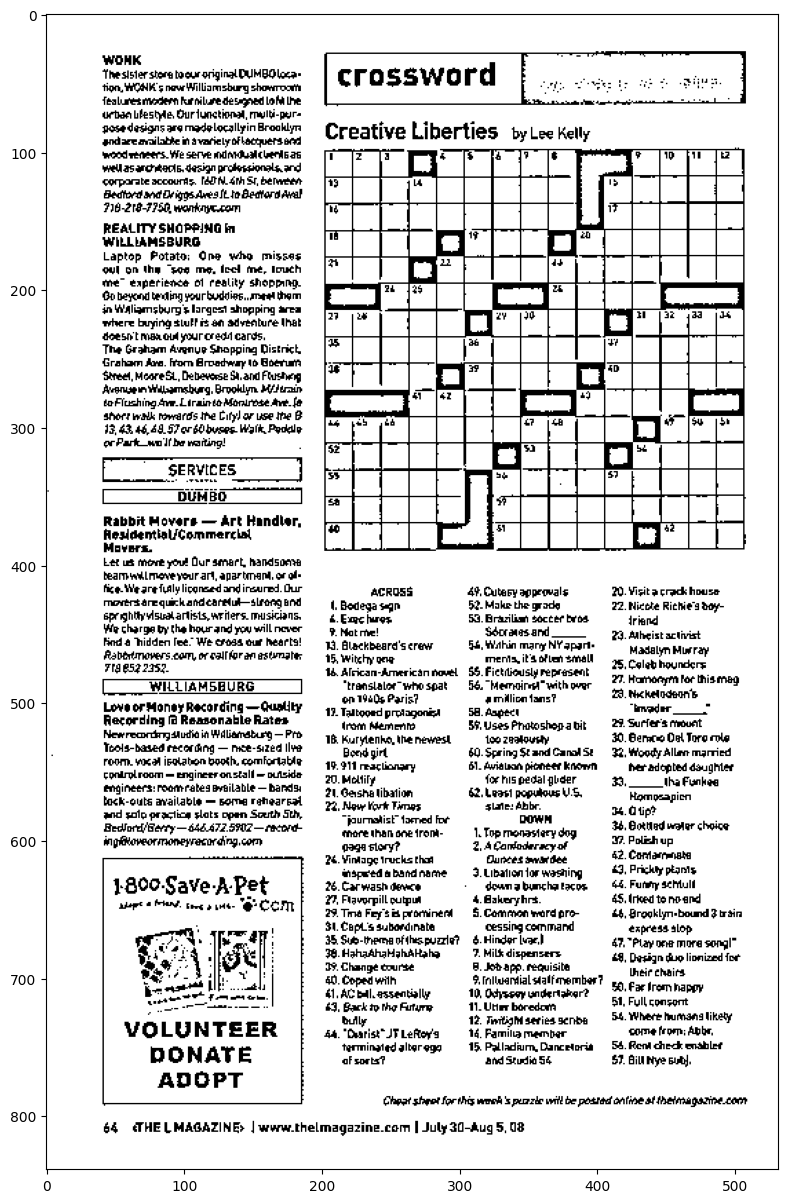

In [81]:
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,20) # Play around with these last 2 numbers
# q: explain the above code
# a: The code applies adaptive thresholding to the input image 'img' using OpenCV's adaptiveThreshold function. 
# It converts the image to a binary image where pixel values are set to 255 (white) or 0 (black) based on the local mean intensity of the neighborhood.
# The parameters used are:
# - 255: The maximum value to use with the THRESH_BINARY thresholding type.
# - cv2.ADAPTIVE_THRESH_MEAN_C: The adaptive method that calculates the threshold value as the mean of the neighborhood area minus a constant C.
# - cv2.THRESH_BINARY: The thresholding type that sets pixel values to the maximum value (255) if they are above the threshold, otherwise to 0.
# - 9: The size of the neighborhood area (blockSize) used to calculate the threshold for each pixel. It must be an odd number.
# - 8: The constant C that is subtracted from the mean or weighted mean calculated. This helps to fine-tune the thresholding result.
show_pic(th2)

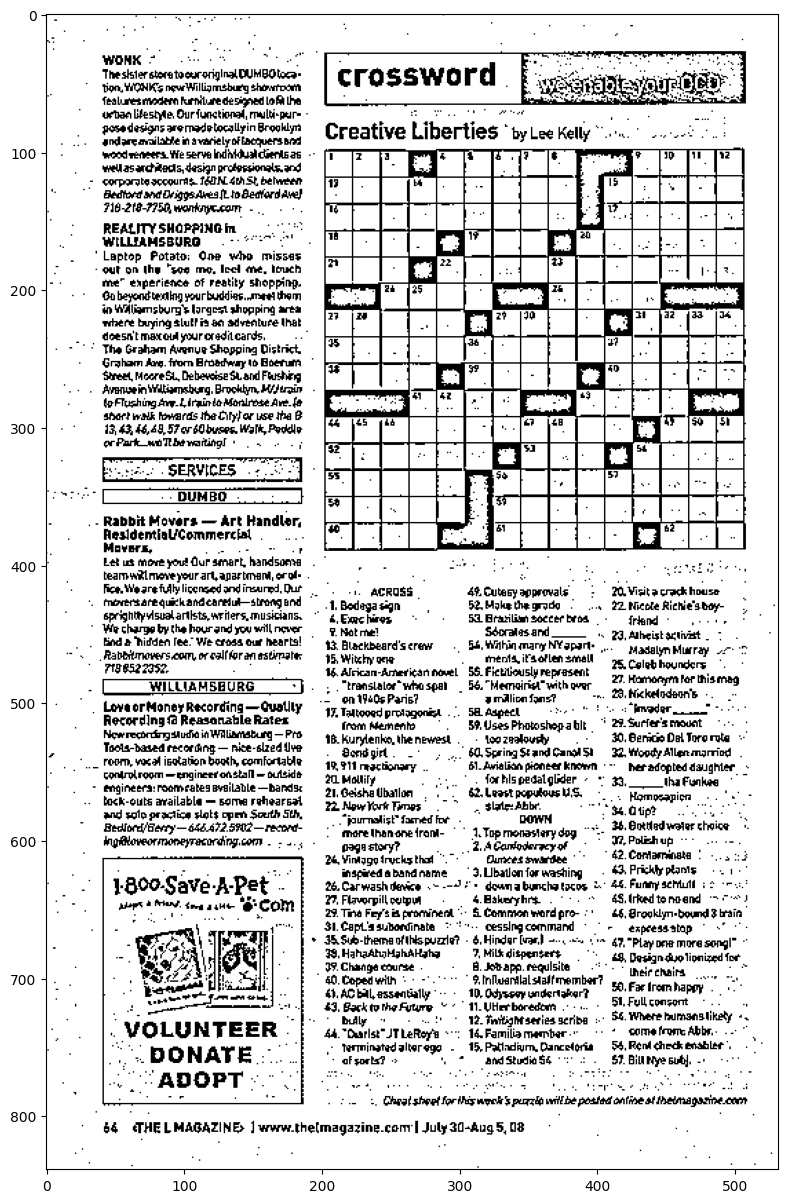

In [84]:
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,15,8)
# q: explain the difference between ADAPTIVE_THRESH_MEAN_C and ADAPTIVE_THRESH_GAUSSIAN_C
# a: The difference between ADAPTIVE_THRESH_MEAN_C and ADAPTIVE_THRESH_GAUSSIAN_C lies in 
# the method used to calculate the threshold value for each pixel based on its neighborhood.
# ADAPTIVE_THRESH_MEAN_C calculates the threshold as the mean of the pixel values in
# the neighborhood area minus a constant C, while ADAPTIVE_THRESH_GAUSSIAN_C calculates
# the threshold as a weighted sum (Gaussian-weighted) of the pixel values in the neighborhood
# minus a constant C. The Gaussian method gives more weight to pixels closer to the center
# of the neighborhood, which can be beneficial in certain scenarios.
show_pic(th3)

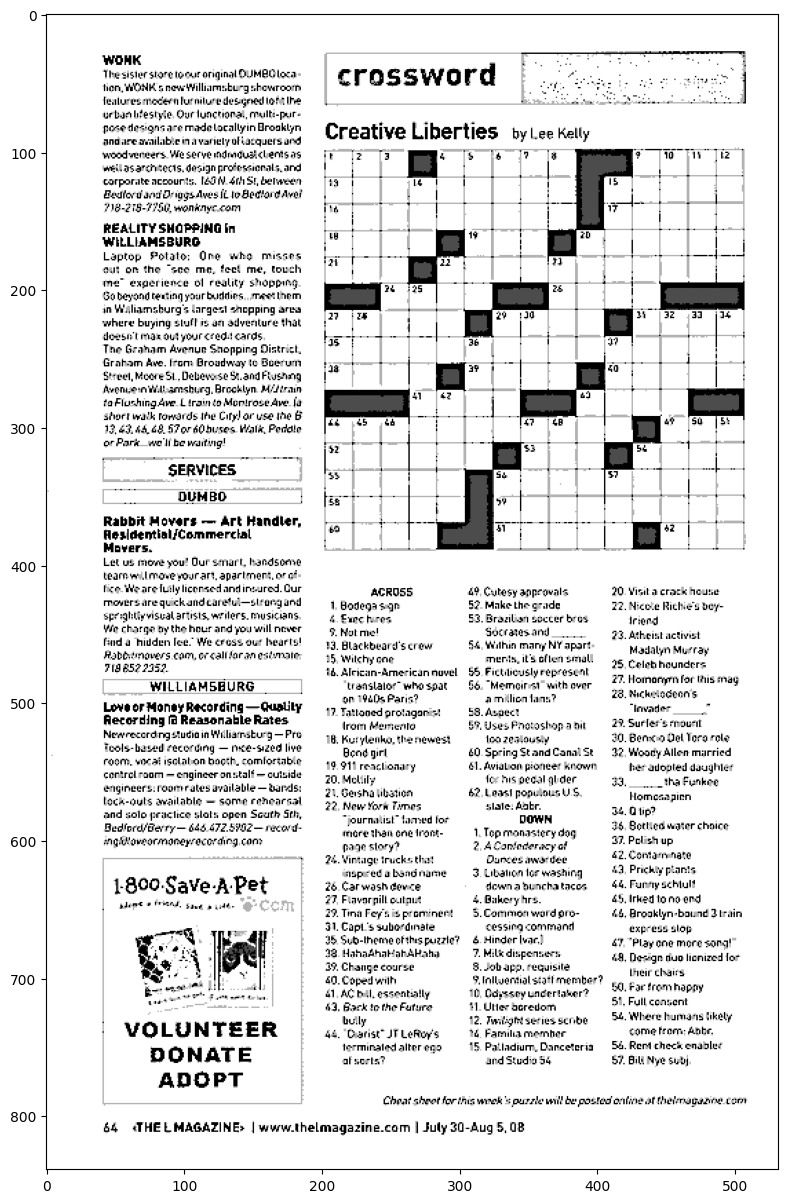

In [86]:
blended = cv2.addWeighted(src1=th1,alpha=0.7,src2=th2,beta=0.3,gamma=0)
show_pic(blended)

## Great Work!